# Cramer-Rao Bound

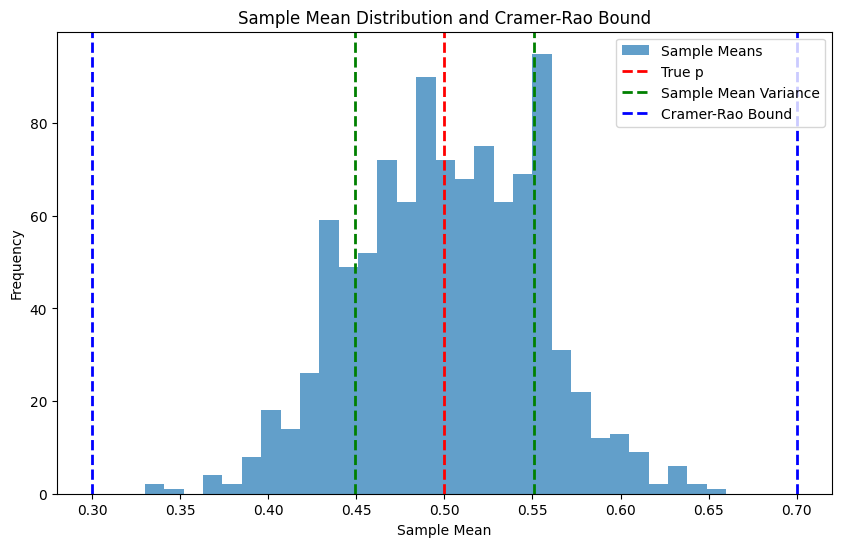

Sample Mean Variance: 0.0026017900000000005
Cramer-Rao Bound: 0.04


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.5  # True parameter of the Bernoulli distribution
n = 100  # Sample size
num_simulations = 1000  # Number of simulations

# Simulate data
data = np.random.binomial(1, p, (num_simulations, n))

# Compute sample means
sample_means = data.mean(axis=1)

# Calculate the variance of the sample means
sample_mean_variance = np.var(sample_means)

# Compute the Cramer-Rao bound
crb = 1 / (n * p * (1 - p))

# Plot
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, alpha=0.7, label='Sample Means')
plt.axvline(p, color='r', linestyle='--', linewidth=2, label='True p')
plt.axvline(p - np.sqrt(sample_mean_variance), color='g', linestyle='--', linewidth=2, label='Sample Mean Variance')
plt.axvline(p + np.sqrt(sample_mean_variance), color='g', linestyle='--', linewidth=2)
plt.axvline(p - np.sqrt(crb), color='b', linestyle='--', linewidth=2, label='Cramer-Rao Bound')
plt.axvline(p + np.sqrt(crb), color='b', linestyle='--', linewidth=2)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sample Mean Distribution and Cramer-Rao Bound')
plt.legend()
plt.show()

# Print variances
print(f'Sample Mean Variance: {sample_mean_variance}')
print(f'Cramer-Rao Bound: {crb}')


In [5]:
import numpy as np
# take a 3x3 matrix
A = [[12, 7, 3],
    [4, 5, 6],
    [7, 8, 9]]

# take a 3x2 matrix
A = [[12, 7],
    [4, 5],
    [7, 8]]
 
# take a 3x4 matrix
B = [[5, 8, 1, 2],
    [6, 7, 3, 0],
    [4, 5, 9, 1]]
 
# result will be 3x4
 
result= [[0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]]
 
result = np.dot(A,B)
print(result)

ValueError: shapes (3,2) and (3,4) not aligned: 2 (dim 1) != 3 (dim 0)

In [8]:
import numpy as np
import scipy.stats as stats

# Step 1: Define the log-likelihood and its second derivative for normal distribution

# Assume we know the true mean and variance for simplicity
true_mu = 5
true_sigma = 0.69

# Log-likelihood function for a single observation
def log_likelihood(x, mu, sigma):
    return -0.5 * np.log(2 * np.pi * sigma**2) - (x - mu)**2 / (2 * sigma**2)

# Second derivative of the log-likelihood function with respect to mu
def second_derivative_log_likelihood(x, mu, sigma):
    return -1 / sigma**2

# Step 2: Compute the Fisher information for a single observation
def fisher_information_single_observation(mu, sigma):
    return 1 / sigma**2

# Fisher information for a single observation
i_theta = fisher_information_single_observation(true_mu, true_sigma)
print(f"Fisher Information for a single observation (i(θ)): {i_theta}")

# Step 3: Simulate data and compute the Fisher information for the entire sample
n = 1000  # sample size
data = np.random.normal(true_mu, true_sigma, n)

# Log-likelihood for the entire sample
def log_likelihood_sample(data, mu, sigma):
    return np.sum(log_likelihood(data, mu, sigma))

# Second derivative of the log-likelihood function with respect to mu for the entire sample
def second_derivative_log_likelihood_sample(data, mu, sigma):
    return np.sum(second_derivative_log_likelihood(data, mu, sigma))

# Step 4: Compute the Fisher information for the entire sample
I_theta = -np.mean(second_derivative_log_likelihood_sample(data, true_mu, true_sigma))
print(f"Fisher Information for the entire sample (I(θ)): {I_theta}")

# Verify that I(θ) = n * i(θ)
expected_I_theta = n * i_theta
print(f"Expected Fisher Information for the entire sample (n * i(θ)): {expected_I_theta}")

# Check the equality
print(f"Equality check: {np.isclose(I_theta, expected_I_theta)}")


Fisher Information for a single observation (i(θ)): 2.100399075824407
Fisher Information for the entire sample (I(θ)): 2.100399075824407
Expected Fisher Information for the entire sample (n * i(θ)): 2100.399075824407
Equality check: False


In [9]:
i_theta

2.100399075824407

In [10]:
I_theta

2.100399075824407

In [13]:
import numpy as np

# Assume we know the true mean and variance for simplicity
true_mu = 0
true_sigma = 1

# Log-likelihood function for a single observation
def log_likelihood(x, mu, sigma):
    return -0.5 * np.log(2 * np.pi * sigma**2) - (x - mu)**2 / (2 * sigma**2)

# Second derivative of the log-likelihood function with respect to mu
def second_derivative_log_likelihood(x, mu, sigma):
    return -1 / sigma**2

# Step 2: Compute the Fisher information for a single observation
def fisher_information_single_observation(mu, sigma):
    return 1 / sigma**2

# Fisher information for a single observation
i_theta = fisher_information_single_observation(true_mu, true_sigma)
print(f"Fisher Information for a single observation (i(θ)): {i_theta}")

# Step 3: Simulate data and compute the Fisher information for the entire sample
n = 1000  # sample size
data = np.random.normal(true_mu, true_sigma, n)

# Log-likelihood for the entire sample
def log_likelihood_sample(data, mu, sigma):
    return np.sum(log_likelihood(data, mu, sigma))

# Second derivative of the log-likelihood function with respect to mu for the entire sample
def second_derivative_log_likelihood_sample(data, mu, sigma):
    return np.sum(second_derivative_log_likelihood(data, mu, sigma))

# Step 4: Compute the Fisher information for the entire sample
I_theta = -second_derivative_log_likelihood_sample(data, true_mu, true_sigma)
print(f"Fisher Information for the entire sample (I(θ)): {I_theta}")

# Verify that I(θ) = n * i(θ)
expected_I_theta = n * i_theta
print(f"Expected Fisher Information for the entire sample (n * i(θ)): {expected_I_theta}")

# Check the equality
print(f"Equality check: {np.isclose(I_theta, expected_I_theta)}")


Fisher Information for a single observation (i(θ)): 1.0
Fisher Information for the entire sample (I(θ)): 1.0
Expected Fisher Information for the entire sample (n * i(θ)): 1000.0
Equality check: False


In [15]:
import numpy as np
import sympy as sp

# Assume we know the true mean and variance for simplicity
true_mu = 0
true_sigma = 1

# Define the symbolic variables
x, mu, sigma = sp.symbols('x mu sigma')

# Define the log-likelihood function for a single observation
log_likelihood = -0.5 * sp.log(2 * sp.pi * sigma**2) - (x - mu)**2 / (2 * sigma**2)

# First derivative of the log-likelihood function with respect to mu
first_derivative = sp.diff(log_likelihood, mu)
first_derivative_func = sp.lambdify((x, mu, sigma), first_derivative)

# Second derivative of the log-likelihood function with respect to mu
second_derivative = sp.diff(first_derivative, mu)
second_derivative_func = sp.lambdify((x, mu, sigma), second_derivative)

# Step 2: Compute the Fisher information for a single observation
def fisher_information_single_observation(mu, sigma):
    # Expectation of the second derivative of log-likelihood
    E_second_derivative = sp.N(second_derivative_func(0, mu, sigma))
    
    # Expectation of the square of the first derivative (score function)
    E_score_squared = sp.N(first_derivative_func(0, mu, sigma)**2)
    
    return -E_second_derivative

# Fisher information for a single observation
i_theta = fisher_information_single_observation(true_mu, true_sigma)
print(f"Fisher Information for a single observation (i(θ)): {i_theta}")

# Step 3: Simulate data and compute the Fisher information for the entire sample
n = 1000  # sample size
data = np.random.normal(true_mu, true_sigma, n)

# Fisher information for the entire sample
def fisher_information_entire_sample(n, mu, sigma):
    return n * fisher_information_single_observation(mu, sigma)

# Compute the Fisher information for the entire sample
I_theta = fisher_information_entire_sample(n, true_mu, true_sigma)
print(f"Fisher Information for the entire sample (I(θ)): {I_theta}")

# Verify that I(θ) = n * i(θ)
expected_I_theta = n * i_theta
print(f"Expected Fisher Information for the entire sample (n * i(θ)): {expected_I_theta}")

# Check the equality
#print(f"Equality check: {np.isclose(I_theta, expected_I_theta)}")


Fisher Information for a single observation (i(θ)): 1.00000000000000
Fisher Information for the entire sample (I(θ)): 1000.00000000000
Expected Fisher Information for the entire sample (n * i(θ)): 1000.00000000000


In [17]:
# Step 3: Simulate data
n = 1000  # sample size
data = np.random.normal(true_mu, true_sigma, n)

# Compute the expectations based on the sample data
def fisher_information_from_sample(data, mu, sigma):
    n = len(data)
    
    # Compute the score function for each data point
    score_values = np.array([first_derivative_func(x, mu, sigma) for x in data])
    
    # Compute the second derivative for each data point
    second_derivative_values = np.array([second_derivative_func(x, mu, sigma) for x in data])
    
    # Calculate the expectations
    E_second_derivative = np.mean(second_derivative_values)
    E_score_squared = np.mean(score_values ** 2)
    
    # Fisher information matrix
    fisher_information = -E_second_derivative + E_score_squared
    
    return fisher_information

# Compute the Fisher information matrix for the sample data
I_theta_sample = fisher_information_from_sample(data, true_mu, true_sigma)
print(f"Fisher Information matrix from the sample data (I(θ)): {I_theta_sample}")

# Verify that I(θ) = n * i(θ)
i_theta = fisher_information_single_observation(true_mu, true_sigma)
expected_I_theta = n * i_theta
print(f"Expected Fisher Information for the entire sample (n * i(θ)): {expected_I_theta}")

# Check the equality
#print(f"Equality check: {np.isclose(I_theta_sample, expected_I_theta)}")

Fisher Information matrix from the sample data (I(θ)): 1.9870789833302434
Expected Fisher Information for the entire sample (n * i(θ)): 1000.00000000000


# Classical test theory

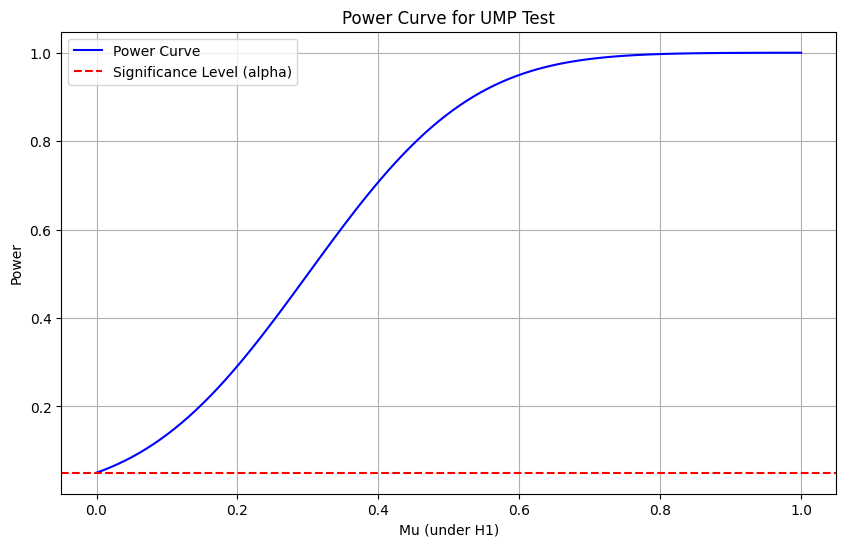

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
alpha = 0.05
n = 30
sigma = 1
mu_null = 3
mu_alternatives = np.linspace(0, 1, 100)  # Different values of mu under H1

# Critical value for Z-test
z_alpha = stats.norm.ppf(1 - alpha)

# Function to calculate power
def calculate_power(mu, n, sigma, z_alpha):
    # Mean and standard error under H1
    se = sigma / np.sqrt(n)
    power = stats.norm.cdf((mu / se) - z_alpha)
    return power

# Calculate power for different mu values
powers = [calculate_power(mu, n, sigma, z_alpha) for mu in mu_alternatives]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu_alternatives, powers, label="Power Curve", color='blue')
plt.axhline(y=alpha, color='r', linestyle='--', label='Significance Level (alpha)')
plt.xlabel("Mu (under H1)")
plt.ylabel("Power")
plt.title("Power Curve for UMP Test")
plt.legend()
plt.grid(True)
plt.show()


Z Critical: 1.959963984540054
Sample mean: 2.4768020061020044
Sample standard deviation: 2.3683381991627415
Standard error: 0.04323974184941987
Test statistic: 6.401564724089997
Critical value: ±1.959963984540054
Reject H0: True
95% Confidence Interval for mu: (2.390920687203581, 2.5626833250004277)


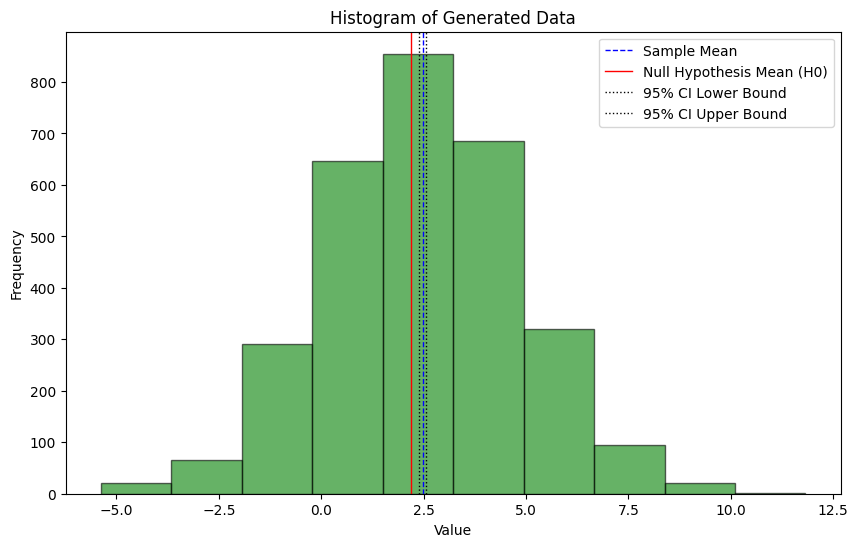

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# True parameters
mu_true = 2.4
sigma = 2.4
n = 3000
mu_null = 2.2
alpha = 0.05 # type i error

# Step 1: Generate Data
np.random.seed(42)
data = np.random.normal(mu_true, sigma, n)

# Step 2: Conduct hyp test
sample_mean = np.mean(data)
sample_std = np.std(data, ddof = 1)
se = sample_std / np.sqrt(n)

# Calculating test statistic
test_statistic = (sample_mean - mu_null) / se

z_critical = stats.norm.ppf(1 - alpha / 2)
print(f'Z Critical: {z_critical}')

# Determine whether to reject
reject_H0 = abs(test_statistic) > z_critical

# Step 3: Convert Critical Value into Confidence Interval
# Confidence Interval formula: sample_mean ± z_critical * (sigma / sqrt(n))
ci_lower = sample_mean - z_critical * (sigma / np.sqrt(n))
ci_upper = sample_mean + z_critical * (sigma / np.sqrt(n))

# Print results
print(f"Sample mean: {sample_mean}")
print(f"Sample standard deviation: {sample_std}")
print(f"Standard error: {se}")
print(f"Test statistic: {test_statistic}")
print(f"Critical value: ±{z_critical}")
print(f"Reject H0: {reject_H0}")
print(f"95% Confidence Interval for mu: ({ci_lower}, {ci_upper})")

# Plotting the sample data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, alpha=0.6, color='g', edgecolor='black')
plt.axvline(sample_mean, color='b', linestyle='dashed', linewidth=1, label='Sample Mean')
plt.axvline(mu_null, color='r', linestyle='solid', linewidth=1, label='Null Hypothesis Mean (H0)')
plt.axvline(ci_lower, color='k', linestyle='dotted', linewidth=1, label='95% CI Lower Bound')
plt.axvline(ci_upper, color='k', linestyle='dotted', linewidth=1, label='95% CI Upper Bound')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Generated Data')
plt.show()

In [1]:
import numpy as np

# Define a numerical example
# We will use a simple multivariate normal distribution for demonstration

# True parameter values (mean vector and covariance matrix)
theta_true = np.array([5, 10])
sigma_true = np.array([[2, 0.5], [0.5, 1]])

# Sample size
n = 100

# Generate sample data from the multivariate normal distribution
np.random.seed(42)  # For reproducibility
data = np.random.multivariate_normal(theta_true, sigma_true, n)

# Estimate the mean vector (T(X) = sample mean)
T_X = np.mean(data, axis=0)

# Covariance of T(X)
cov_T_X = np.cov(data.T) / n  # Note: np.cov calculates the covariance matrix

# Systematic part (bias)
bias = (T_X - theta_true).reshape(-1, 1)
systematic_part = bias @ bias.T

# Matrix-valued MSE
MSE_theta_T_X = cov_T_X + systematic_part

{
    "Sample Mean (T(X))": T_X,
    "Covariance of T(X)": cov_T_X,
    "Bias (T(X) - theta)": bias.flatten(),
    "Systematic Part": systematic_part,
    "Matrix-valued MSE": MSE_theta_T_X
}


{'Sample Mean (T(X))': array([ 5.14702389, 10.09369039]),
 'Covariance of T(X)': array([[0.01523112, 0.00266643],
        [0.00266643, 0.00886383]]),
 'Bias (T(X) - theta)': array([0.14702389, 0.09369039]),
 'Systematic Part': array([[0.02161602, 0.01377473],
        [0.01377473, 0.00877789]]),
 'Matrix-valued MSE': array([[0.03684714, 0.01644116],
        [0.01644116, 0.01764172]])}

In [2]:
MSE_theta_T_X

array([[0.03684714, 0.01644116],
       [0.01644116, 0.01764172]])

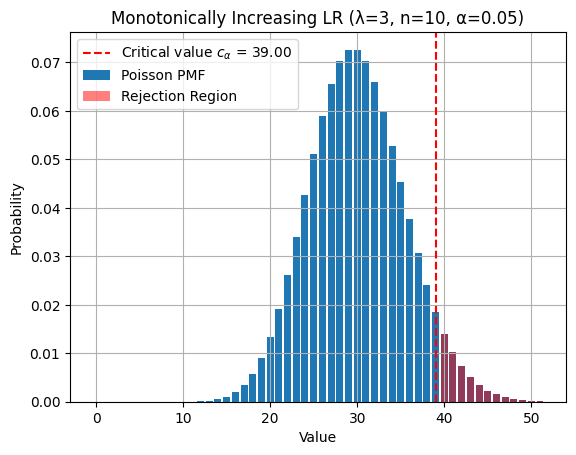

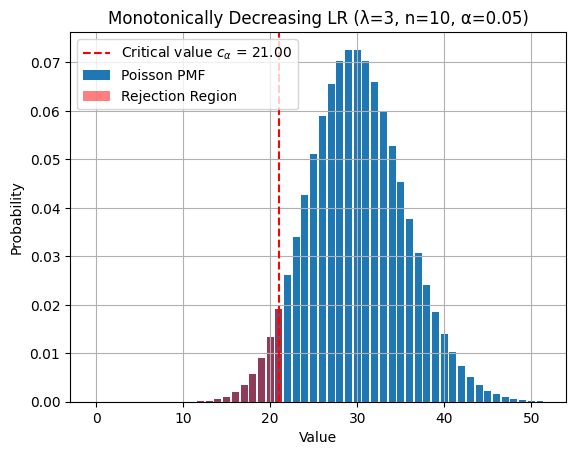

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_poisson_distribution(lambda_, n, alpha, increasing=True):
    # Define the Poisson distribution
    rv = stats.poisson(mu=n*lambda_)
    
    # Generate the x values (possible outcomes)
    x = np.arange(0, np.ceil(rv.mean() + 4*rv.std()))
    
    # Compute the PMF values for these outcomes
    pmf_values = rv.pmf(x)
    
    # Find the critical value c_alpha
    if increasing:
        # For monotonically increasing LR, find the 1 - alpha quantile
        c_alpha = rv.ppf(1 - alpha)
        title = 'Monotonically Increasing LR'
    else:
        # For monotonically decreasing LR, find the alpha quantile
        c_alpha = rv.ppf(alpha)
        title = 'Monotonically Decreasing LR'
    
    # Plot the PMF
    plt.bar(x, pmf_values, label='Poisson PMF')
    
    # Highlight the critical region
    if increasing:
        critical_region = x > c_alpha
    else:
        critical_region = x <= c_alpha
    
    plt.bar(x[critical_region], pmf_values[critical_region], color='red', alpha=0.5, label='Rejection Region')
    
    # Add a vertical line for c_alpha
    plt.axvline(c_alpha, color='red', linestyle='--', label=f'Critical value $c_\\alpha$ = {c_alpha:.2f}')
    
    # Plot settings
    plt.title(f'{title} (λ={lambda_}, n={n}, α={alpha})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
lambda_ = 3  # Poisson distribution rate parameter
n = 10       # Number of trials
alpha = 0.05 # Significance level

# Plot for monotonically increasing LR
plot_poisson_distribution(lambda_, n, alpha, increasing=True)

# Plot for monotonically decreasing LR
plot_poisson_distribution(lambda_, n, alpha, increasing=False)
